In [10]:
import keras
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

import os
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [2]:
batch_size = 128
epochs = 10
IMG_HEIGHT = 240
IMG_WIDTH = 240

model_path = '../models/brats_model_5.h5'

train_dir = '../data/train/t2'
valid_dir = '../data/valid/t2'

In [3]:

model = Sequential([
        Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,1), name='conv_a'),
        MaxPooling2D(name='max_a'),
        Dropout(0.2,name='drop_a'),
        Conv2D(32, 3, padding='same', activation='relu', name='conv_b'),
        MaxPooling2D(name='max_b'),
        Conv2D(64, 3, padding='same', activation='relu', name='conv_c'),
        MaxPooling2D(name='max_c'),
        Dropout(0.2, name='drop_b'),
        Flatten(name='flat_a'),
        Dense(512, activation='relu', name='dense_a'),
        Dense(2, activation='softmax', name='dense_b')
    ])






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [4]:
train_image_generator = ImageDataGenerator(rescale=1./255, 
                                           rotation_range=45)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [5]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           color_mode="grayscale",
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical')

Found 13440 images belonging to 2 classes.


In [6]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=valid_dir,
                                                           shuffle=True,
                                                           color_mode="grayscale",
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical')

Found 3360 images belonging to 2 classes.


In [7]:
sample_training_images, l = next(val_data_gen)

In [8]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img[:,:,0], cmap='gray')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

[[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


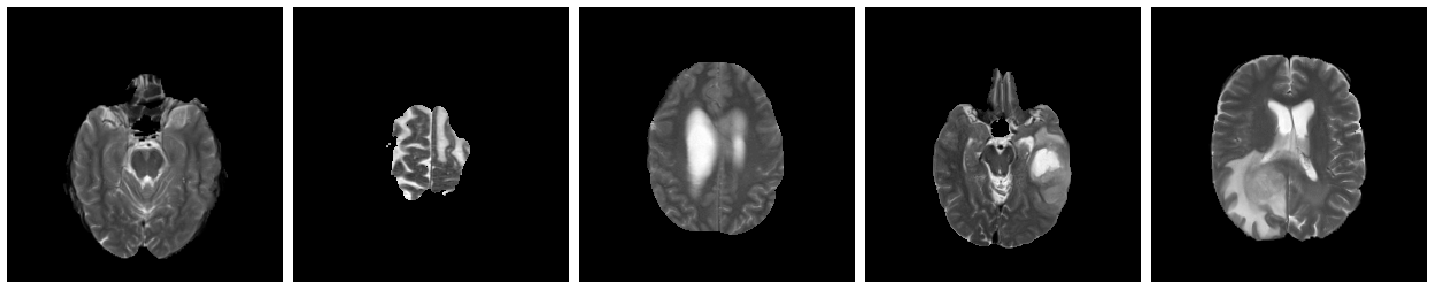

In [11]:
print(l[:5])
plotImages(sample_training_images[:5])

In [12]:
adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_a (Conv2D)              (None, 240, 240, 16)      160       
_________________________________________________________________
max_a (MaxPooling2D)         (None, 120, 120, 16)      0         
_________________________________________________________________
drop_a (Dropout)             (None, 120, 120, 16)      0         
_________________________________________________________________
conv_b (Conv2D)              (None, 120, 120, 32)      4640      
_________________________________________________________________
max_b (MaxPooling2D)         (None, 60, 60, 32)        0         
_________________________________________________________________
conv_c (Conv2D)              (None, 60, 60, 64)        18496     
_________________________________________________________________
max_c (MaxPooling2D)         (None, 30, 30, 64)        0         
__________

In [14]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=train_data_gen.samples // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=val_data_gen.samples // batch_size
)

# Save the model
model.save(model_path);

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/10




105/105 [==============================] - 53s 501ms/step - loss: 0.5393 - acc: 0.7381 - val_loss: 0.5545 - val_acc: 0.7209
Epoch 2/10
105/105 [==============================] - 51s 490ms/step - loss: 0.4893 - acc: 0.7599 - val_loss: 0.5261 - val_acc: 0.7443
Epoch 3/10
105/105 [==============================] - 52s 496ms/step - loss: 0.4676 - acc: 0.7717 - val_loss: 0.4984 - val_acc: 0.7447
Epoch 4/10
105/105 [==============================] - 52s 493ms/step - loss: 0.4435 - acc: 0.7853 - val_loss: 0.5227 - val_acc: 0.7553
Epoch 5/10
105/105 [==============================] - 53s 508ms/step - loss: 0.4341 - acc: 0.7927 - val_loss: 0.5187 - val_acc: 0.7423
Epoch 6/10
105/105 [==============================] - 52s 497ms/step - loss: 0.3978 - acc: 0.8096 - val_loss: 0.4706 - val_acc: 0.7655
Epoch 7/10
105/105 [==============================] - 53s 509ms/step - loss: 0.3548 - acc

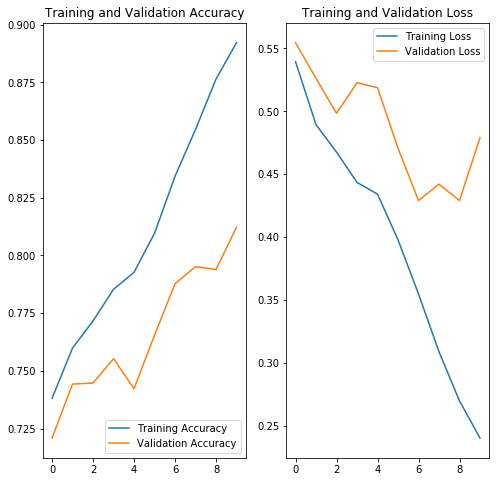

In [16]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()